## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_research_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_research_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(combined_research_data['Mouse ID'].value_counts())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicates_removed = combined_research_data[['Mouse ID', "Timepoint"]]
#unique_mice = duplicates_removed['Mouse ID'].unique()
#duplicates_removed = duplicates_removed.groupby(unique_mice)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [ ]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = combined_research_data.groupby('Drug Regimen')
tumor_data = summary_stats['Tumor Volume (mm3)']

tumor_mean = (tumor_data).mean()
tumor_median = (tumor_data).median()
tumor_variance = (tumor_data).var()
tumor_stdev = (tumor_data).std()
tumor_sem = (tumor_data).sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({"Mean": tumor_mean,
                                "Median": tumor_median,
                                "Variance": tumor_variance,
                                "Standard Deviation": tumor_stdev,
                                "Standard Error of Mean": tumor_sem})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements for Each Drug Regimen')

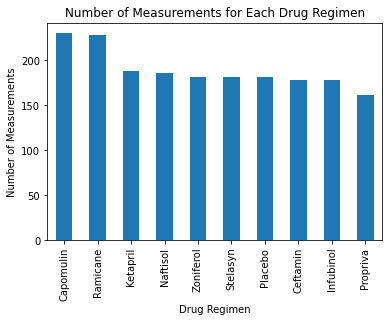

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
pandas_bar_plot = combined_research_data['Drug Regimen'].value_counts().plot.bar()

pandas_bar_plot.set_xlabel("Drug Regimen")
pandas_bar_plot.set_ylabel("Number of Measurements")
pandas_bar_plot.set_title("Number of Measurements for Each Drug Regimen")

([<matplotlib.axis.XTick at 0x7f8594b8a630>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Zoniferol'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Propriva')])

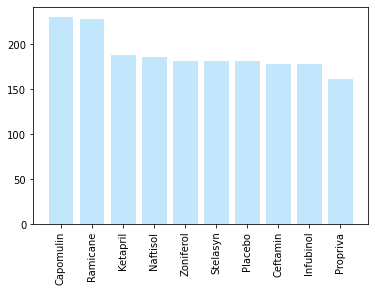

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen = combined_research_data['Drug Regimen'].value_counts()
x_axis = np.arange(len(drug_regimen))

plt.bar(x_axis, drug_regimen, color='lightskyblue', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen.index.values, rotation='vertical')

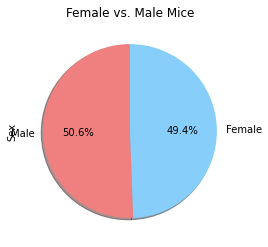

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pandas_pie = combined_research_data['Sex'].value_counts()
colors = ["lightcoral", "lightskyblue"]

pandas_pie_plot = pandas_pie.plot.pie(title='Female vs. Male Mice Using Pandas', labels=pandas_pie.index.values, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)


Text(0.5, 1.0, 'Female vs. Male Mice Using Pyplot')

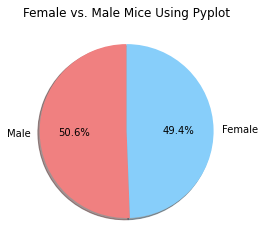

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pandas_pie, labels=pandas_pie.index.values, colors = ["lightcoral", "lightskyblue"], autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('Female vs. Male Mice Using Pyplot')

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
